# OAK - logo generation
 - doc: https://github.com/openaiknowledge/pr3


 

# Import Libraries

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.utils 
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy as np

from google.colab import drive

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds

import pathlib

import time

from tensorflow.image import sobel_edges

# Load Dataset

In [ ]:
BASE_FOLDER = '/content/drive/My Drive/openaiknowledge/pr3/'
DATA = BASE_FOLDER + 'data/1/' #version 1
IMAGES = DATA + "images/"
MODEL = BASE_FOLDER + "model/1/"
IMAGES_GENERATED = IMAGES + "generated/"

In [ ]:
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_image_pil(image_url):
  image = PIL.Image.open(image_url)
  plot_image(image)

def show_image(image_url):
  image = tf.keras.preprocessing.image.load_img(image_url)
  plot_image(image)

## Preprocessing data


In [ ]:
def normalize_image(image):
  return (image - 127.5) / 127.5

def desnormalize_image(image):
  return (image * 127.5) + 127.5

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    value =  tf.image.rgb_to_grayscale(rgb, name=None)
    return tf.reshape(value, list(rgb.shape)[0:2]) #plt needs gray in 2 dimensions

In [ ]:
batch_size = 32
img_height = 256 #28 #todo review
img_width = img_height

In [ ]:
train_2011_path = IMAGES + "space" #'/content/drive/My Drive/openaiknowledge/pr3/data/1/images/2001'
train_ds_2001 = tf.keras.preprocessing.image_dataset_from_directory(
  train_2011_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  smart_resize="True")

#train_images_2001 = train_images.reshape(train_images.shape[0], img_height, img_width, 1).astype('float32')
#train_images_2001 = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

print(train_ds_2001.class_names)


Found 5 files belonging to 1 classes.
Using 4 files for training.
['hal']


In [ ]:
print(type(train_ds_2001))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


### Visualize the data

# Edge detection

Based on: http://thegrimm.net/2017/12/14/tensorflow-image-convolution-edge-detection/
https://www.tensorflow.org/api_docs/python/tf/image/sobel_edges


### Prepare data from dataset

(-0.5, 224.5, 224.5, -0.5)

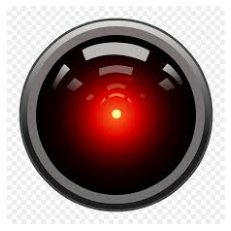

In [ ]:
image_path = IMAGES + "space/" + "hal.jpeg"
image_bytes = tf.io.read_file(image_path)
image = tf.image.decode_image(image_bytes)
image = tf.cast(image, tf.float32)
image = tf.expand_dims(image, 0)

plt.imshow(image[0].numpy().astype("uint8"))
plt.axis("off")

In [ ]:

sobel = tf.image.sobel_edges(image)
sobel_y = np.asarray(sobel[0, :, :, :, 0]) # sobel in y-direction
sobel_x = np.asarray(sobel[0, :, :, :, 1]) # sobel in x-direction

(-0.5, 224.5, 224.5, -0.5)

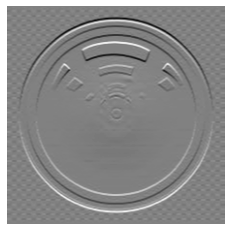

In [ ]:
plt.imshow(sobel_y[..., 0] / 4 + 0.5, cmap="gray")
plt.axis("off")

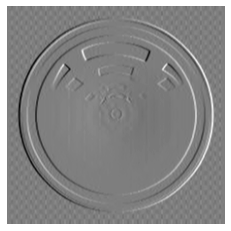

In [ ]:
plt.imshow(sobel_x[..., 0] / 4 + 0.5,cmap="gray")
plt.axis("off")
plt.savefig('hal_gray.png')


(1, 225, 225, 3, 2)
(225, 225, 3)
(225, 225)


(-0.5, 224.5, 224.5, -0.5)

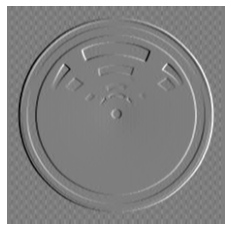

In [ ]:
print(sobel.shape)
sample = sobel[0][..., 1] #tf.squeeze(sobel)
path = IMAGES_GENERATED+"hal_generated_gray_sobel_x.png"
path_array = IMAGES_GENERATED+"hal_generated_gray_sobel"

tf.keras.preprocessing.image.save_img(
    path, sample, data_format=None, file_format=None, scale=True
)

sample_gray = rgb2gray(sample)
print(sample.shape)
print(sample_gray.shape)
plt.imshow(sample_gray,cmap="gray")
plt.axis("off")

(225, 225)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(225, 225, 1)


(-0.5, 224.5, 224.5, -0.5)

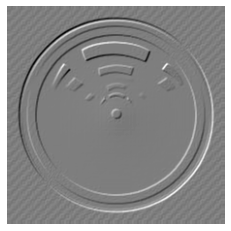

In [ ]:
sobel_sum = sobel_x + sobel_y
sobel_sum_gray = rgb2gray(sobel_sum)
print(sobel_sum_gray.shape)

print(type(sobel_sum_gray))
sobel_sum_gray_3 = np.reshape(sobel_sum_gray,[sobel_sum_gray.shape[0],sobel_sum_gray.shape[1],1])
print(sobel_sum_gray_3.shape)
#tf.keras.preprocessing.image.save_img(path, sobel_sum_gray_3, data_format=None, file_format=None, scale=True)
np.save(path_array, sobel_sum_gray)

plt.imshow(sobel_sum_gray,cmap="gray")
plt.axis("off")

(225, 225)


(-0.5, 224.5, 224.5, -0.5)

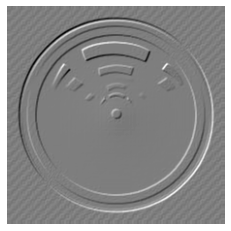

In [ ]:
test_image = np.load(path_array+".npy")
print(test_image.shape)
plt.imshow(test_image,cmap="gray")
plt.axis("off")